In [55]:
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
with open('Mrk509_arrays/avg_temp_2darr.npy', 'rb') as f:
    avg_temp_2darr = np.load(f)
    avg_temp_2darr_med = np.load(f)
    avg_temp_2darr_noIR = np.load(f)
    
print(len(avg_temp_2darr))

161


In [4]:
with open('Mrk509_arrays/avg_temp_final.npy', 'rb') as f:
    avg_temp_split_all = np.load(f)
    avg_temp_split_med = np.load(f)
    avg_temp_split_noIR = np.load(f)
    
print(len(avg_temp_split_all))

36


In [6]:
with open('Mrk509_arrays/transition.npy', 'rb') as f:
    n_transition_all = np.load(f)
    n_transition_med = np.load(f)
    n_transition_noIR = np.load(f)
    n_transition_stacked = np.load(f)
    te_transition_all = np.load(f)
    te_transition_med = np.load(f)
    te_transition_noIR = np.load(f)
    Te_transition_stacked = np.load(f)
print(len(n_transition_all))

36


In [7]:
print(n_transition_all)

[ 2.6 10.   2.2  5.1 10.9 10.9 10.8 10.7 10.5 10.4 10.2 10.   9.8  9.6
  9.8  9.7  9.4  9.1  9.   9.1  9.2  9.1  8.7  8.5  8.3  8.2  8.   7.8
  7.6  7.4  7.3  7.1  6.9  6.7  6.5  6.3]


In [13]:
xi_stepsize = 0.2
hden_stepsize = 0.1
xi = data.logspace(-1, 6, xi_stepsize)
hden = data.logspace(-1, 15, hden_stepsize)

xi_lin = data.linspace(-1, 6, xi_stepsize)
hden_lin = data.linspace(-1, 15, hden_stepsize)

xi_split = np.array_split(xi_lin, 4)
name_index  = {0:'full IR', 1:'intermediate IR', 2:'no IR'}

In [15]:
avg_temp_split_stacked = np.stack((avg_temp_split_all, avg_temp_split_med, avg_temp_split_noIR), axis=1)

<AxesSubplot:title={'center':'Average temperature vs number density of Mrk509'}, xlabel='log$_{10}$(n$_H$/[cm$^{-3}$])', ylabel='log$_{10}$(T/[K])'>

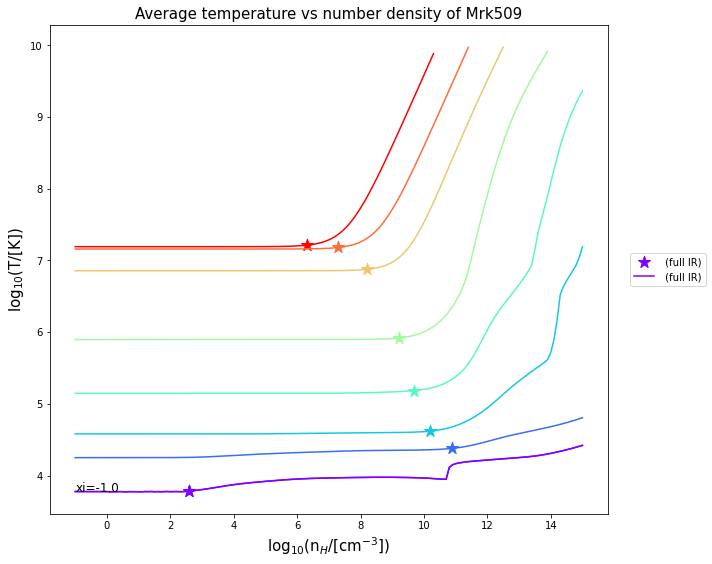

In [17]:
plot2.AvgTemp_vs_n_1(
    hden_lin,
    xi,
    xi_lin,
    avg_temp_split_stacked,
    n_transition_stacked,
    Te_transition_stacked,
    name_index,
)

In [56]:
#hdu = fits.open('Tmap_IR.fits')
hdu = fits.open('Tmap_noIR.fits')
hdu.info()
cnt_data = (hdu[0].data).astype('float64') # REtr

Filename: Tmap_noIR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TMAP          1 PrimaryHDU      25   (8, 16)   float64   


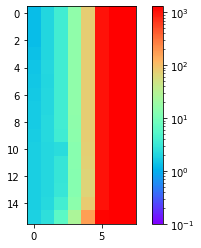

In [57]:
# Shows cnt files before masking and filtering 
fig, ax = plt.subplots()
plt.imshow(cnt_data, cmap='rainbow', norm=colors.LogNorm(vmin=.1, vmax=1300))
plt.colorbar()

In [58]:
xi_lin_xs = data.linspace(0, 7, 1)
hden_lin_xs = data.linspace(0, 15, 1)

In [59]:
a = hdu[0].data
c = []
for j in range(len(xi_lin_xs)):
    b = [i[j] for i in a]
    c.append(b)
temp_n_xs = c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


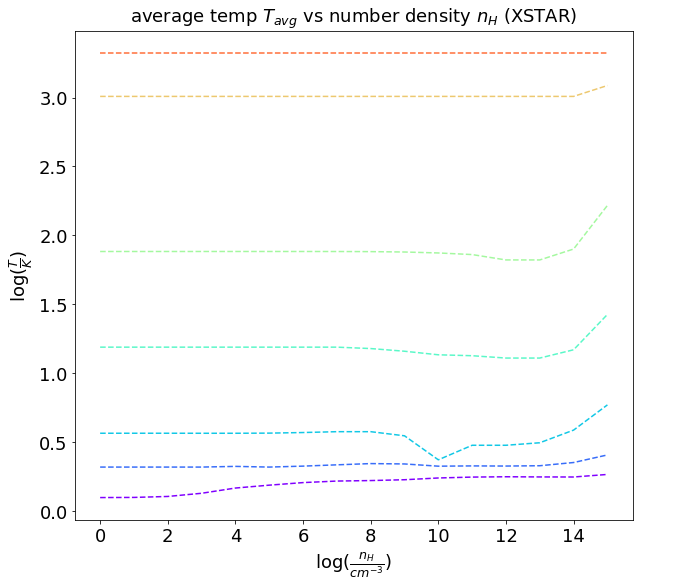

In [64]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs number density $n_H$ (XSTAR)",
    fontsize=18,
)
#plt.xlabel("number density $n_H$", fontsize=15)
plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=18)
plt.ylabel(r'log($\frac{T}{K}$)', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
for i in range(0, len(temp_n_xs)-1):
    plt.plot(hden_lin_xs, np.log10(temp_n_xs[i]), color=colors[i], linestyle='--')#, label=" $\\xi$=" + str(xi_lin[i]))
    
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15, frameon=False)

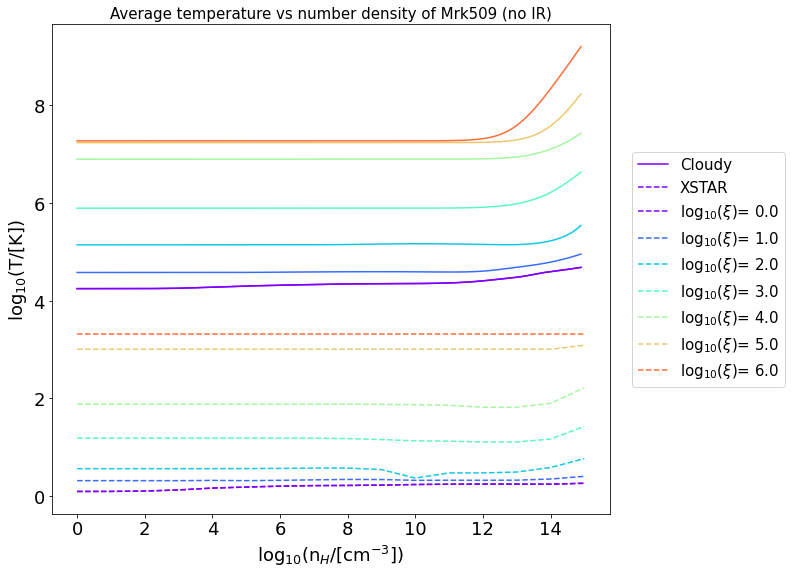

In [61]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of Mrk509 (no IR)", fontsize=15)
#plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 5#increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][2]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i-5]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(temp_n_xs[0]), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)-1):
    plt.plot(hden_lin_xs, np.log10(temp_n_xs[i]), color=colors[i], linestyle='--', label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))
    
#plt.text(hden_lin[0], np.log10(avg_temp_split_stacked[0][0][0]), "xi=" + str(xi_lin[0]), fontsize=12)
#lt.colorbar()
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

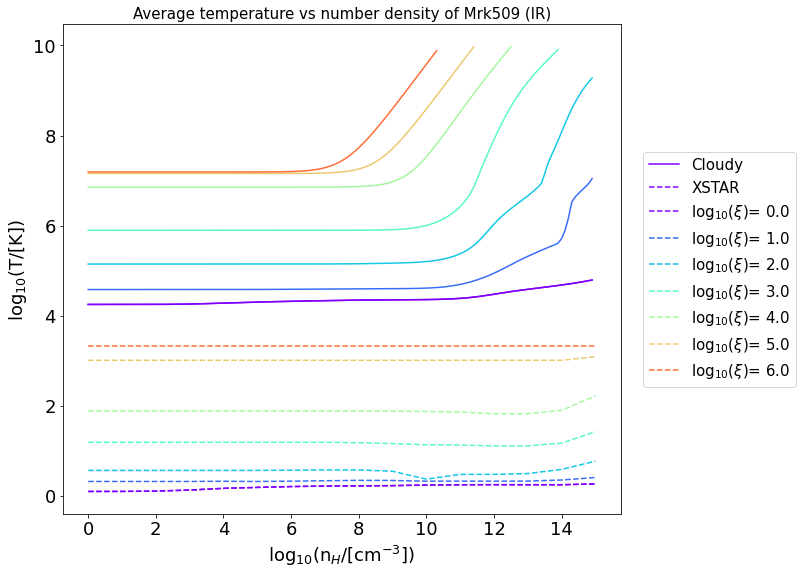

In [62]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title("Average temperature vs number density of Mrk509 (IR)", fontsize=15)
#plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=15)
plt.xlabel(r'log$_{10}$(n$_H$/[cm$^{-3}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_split_stacked)))
xi_stepsize = np.abs(xi_lin[0] - xi_lin[1])
increment = int(1 / xi_stepsize)
i = 5#increment
while i <= (len(xi)): # - increment):
    row = avg_temp_split_stacked[i][0]
    #row = np.log10(avg_temp_split_stacked[i][0])
    (index,) = np.where(row != 1e-30)
    if i == 5:
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
        , label= 'Cloudy')
    if len(index) == len(row):
        plt.plot(
            hden_lin[10:-1], np.log10(row[10:-1]), color=colors[i-5]
      # , label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i])
        )  # , label= 'xi='  + str(i-1) + ' (' + str(name_index[0]) + ')')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            #den_lin[index], np.log10(row)[0:end], color=colors[i-5]
            hden_lin[10:end], np.log10(row)[10:end], color=colors[i-5]
        )  # , label= 'xi=' + str(i-1) + ' (' + str(name_index[0]) + ')')
    i += increment

colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n_xs)))
plt.plot(hden_lin_xs, np.log10(temp_n_xs[0]), color=colors[0], linestyle='--', label='XSTAR')
for i in range(0, len(temp_n_xs)-1):
    plt.plot(hden_lin_xs, np.log10(temp_n_xs[i]), color=colors[i], linestyle='--', label="log$_{10}$($\\xi$)= " + str(xi_lin_xs[i]))
    
#plt.text(hden_lin[0], np.log10(avg_temp_split_stacked[0][0][0]), "xi=" + str(xi_lin[0]), fontsize=12)
#lt.colorbar()
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15)

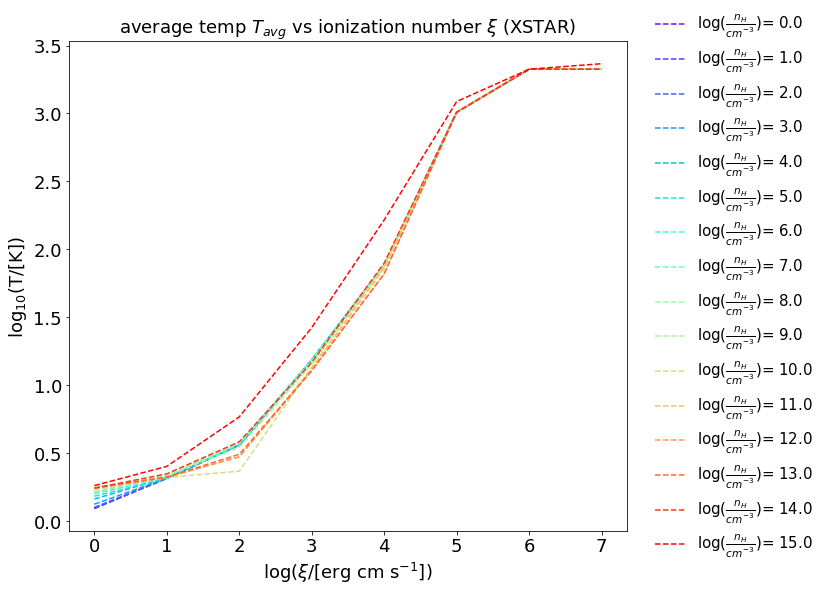

In [75]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs ionization number $\\xi$ (XSTAR)",
    fontsize=18,
)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)
#plt.xscale("log")
#plt.yscale("log")
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)
colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
for i in range(len(hden_lin_xs)):
    row = np.array((hdu[0].data)[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin_xs, np.log10(row), color=colors[i], label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]), linestyle='--')
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin_xs[0:end],
            np.log10(row[0:end]),
            color=colors[i],
            label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]),
            linestyle='--',
        )
    
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,fontsize=15, frameon=False)

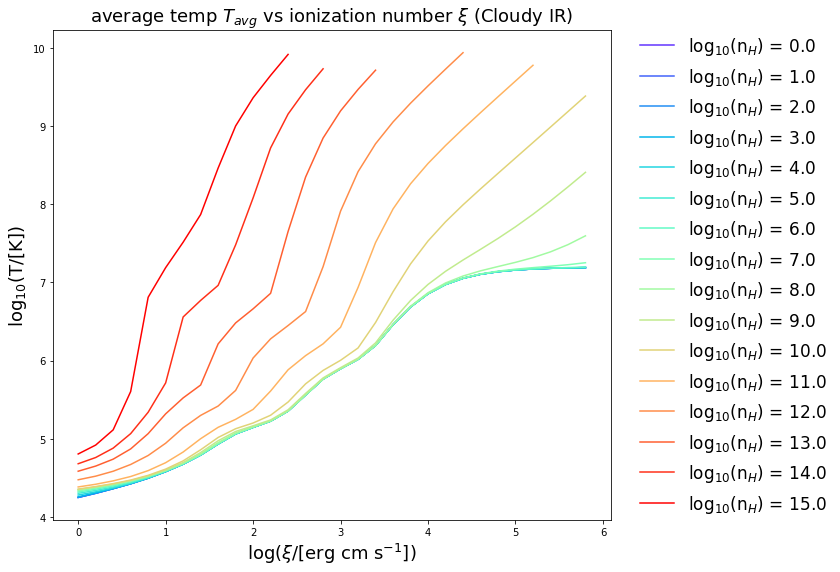

In [99]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs ionization number $\\xi$ (Cloudy IR)",
    fontsize=18,
)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr)))

increment = 10
i = 10
while i <= (len(hden_lin)):
#for i in range(len(hden)):
    row = np.array(avg_temp_2darr[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin[5:-1], np.log10(row[5:-1]), color=colors[i], label=r'log$_{10}$(n$_H$) = ' + str(hden_lin[i]))
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[5:end],
            np.log10(row)[5:end],
            color=colors[i],
            label=r'log$_{10}$(n$_H$) = ' + str(hden_lin[i]),
        )
    i += increment
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize = 17, frameon=False)

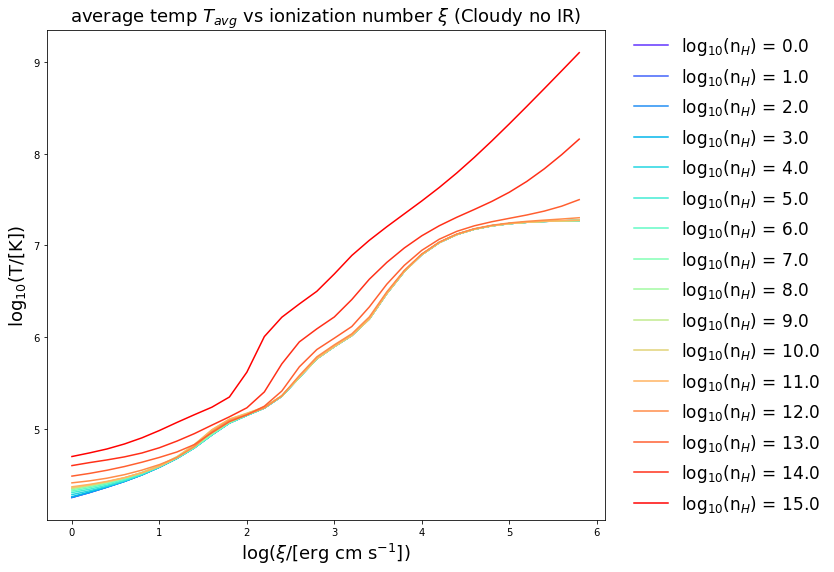

In [101]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs ionization number $\\xi$ (Cloudy no IR)",
    fontsize=18,
)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=18)

colors = plt.cm.rainbow(np.linspace(0, 1, len(avg_temp_2darr_noIR)))

increment = 10
i = 10
while i <= (len(hden_lin)):
#for i in range(len(hden)):
    row = np.array(avg_temp_2darr_noIR[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin[5:-1], np.log10(row[5:-1]), color=colors[i], label=r'log$_{10}$(n$_H$) = ' + str(hden_lin[i]))
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[5:end],
            np.log10(row)[5:end],
            color=colors[i],
            label=r'log$_{10}$(n$_H$) = ' + str(hden_lin[i]),
        )
    i += increment
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize = 17, frameon=False)

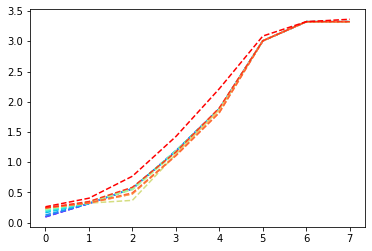

In [106]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
for i in range(len(hden_lin_xs)):
    row = np.array((hdu[0].data)[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin_xs, np.log10(row), color=colors[i], label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]), linestyle='--')
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin_xs[0:end],
            np.log10(row[0:end]),
            color=colors[i],
            label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin_xs[i]),
            linestyle='--',
        )
    